# Group 12 Project - Australia Housing Prices

## Scope

Housing prices have always been a topic for everyone living in sydney since the early 2000. Many government reforms have inflated the housing bubble causing the price of houses to ever rise. The outbreak of coronavirus changed the lives of many and taught individuals to adapt to change. The purpose of this project is to analyse the house price inflation during and after the effects of coronavirus.

The overall project will assess the various changes in house prices and how they have been affected from the outbreak of coronavirus. With many fluctuations in population and travel being limited in many areas of the state of NSW. It will create a story which can be visualised through graphical representations of data. 

Our goal is to represent the data that has already been collected by the Australian Bureau of Statistics during the epidemic and visualise it. The data will be broken down into its simplest form and from there built upon itself. Four open ended questions are provided in this document, which allow for the extensive exploration of the data we have collected. These questions will analyse some of the most critical decisions made by the people of NSW and how coronavirus has affected the prices of houses NSW, especially Sydney. 

## Resources 

Resources are collected and retrieved from [Australian Bureau of Statistics](https://www.abs.gov.au/).

Data required for the Project is provided 
1. [Residential Property Price Indexes: Eight Capital Cities](https://www.abs.gov.au/statistics/economy/price-indexes-and-inflation/residential-property-price-indexes-eight-capital-cities/latest-release#data-download).  This download is provided for you as `Residental House Prices - 8 Capital Cities.csv`.
2. [National, state and territory population](https://www.abs.gov.au/statistics/people/population/national-state-and-territory-population/latest-release).  This download is provided for you as `Australia Population.csv`.

## Questions
* Present and analyse the effects of COVID-19 on the house prices.
* How many people have purchased houses during the pandemic? What factors may have influenced this?
* Compare the housing prices to the population in Australia, what is the trend? 
* Interpret whether the housing prices are over or under fitting.

These questions are designed to analyse in-depth of the overall effects of COVID-19 on the population and the house pricing across Australia.

## Import Libraries

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings("ignore")

## Import Data Sets

In [2]:
Property_Index = pd.read_csv("Residental House Prices - 8 Capital Cities.csv",index_col=0)
Property_Index

,Region,Price Index,Growth rate
Period,,,
2019 - March,Sydney,154.2,-10.3
2019 - June,Sydney,153.5,-9.6
2019 - September,Sydney,159.0,-4.6
2019 - December,Sydney,166.4,3.7
2020 - March,Sydney,169.6,10.0
...,...,...,...
2020 - March,Australia,145.8,7.4
2020 - June,Australia,143.2,6.2
2020 - September,Australia,144.3,4.5


In [3]:
Population = pd.read_csv("Australia Population.csv",index_col=0, thousands=',')
Population

,Region,Population,Growth Rate
Period,,,
2019 - March,New South Wales,33259,0.41
2019 - June,New South Wales,17455,0.22
2019 - September,New South Wales,28706,0.35
2019 - December,New South Wales,21237,0.26
2020 - March,New South Wales,27317,0.34
...,...,...,...
2020 - March,Australia,110742,0.43
2020 - June,Australia,24686,0.10
2020 - September,Australia,-12397,-0.05


In [4]:
NSW_Population = pd.read_csv("NSW Population.csv")
NSW_Population

,Local Government Area,2019 Population,2020 Population,2019-2020 Population Change,Percentage of Change (%)
0,Albury (C),54344,55055,711,1.3
1,Armidale Regional (A),29812,29704,-108,-0.4
2,Ballina (A),44622,45217,595,1.3
3,Balranald (A),2338,2306,-32,-1.4
4,Bathurst Regional (A),43612,43996,384,0.9
...,...,...,...,...,...
124,Wollondilly (A),53143,54005,862,1.6
125,Wollongong (C),218076,219798,1722,0.8
126,Woollahra (A),59345,59431,86,0.1
127,Yass Valley (A),17086,17321,235,1.4


In [5]:
NSW_Change = pd.read_csv("NSW Population Change.csv")
NSW_Change

,Local Government Area,Natural increase,Net internal migration,Net overseas migration,Area (km^2),Population density 2020 (km^2)
0,Albury (C),201,335,175,305.9,180.0
1,Armidale Regional (A),128,-464,228,7809.4,3.8
2,Ballina (A),-81,554,122,484.9,93.2
3,Balranald (A),10,-46,4,21690.7,0.1
4,Bathurst Regional (A),150,132,102,3817.9,11.5
...,...,...,...,...,...,...
124,Wollondilly (A),431,358,73,2555.4,21.1
125,Wollongong (C),747,-434,1409,684.0,321.3
126,Woollahra (A),257,-639,468,12.3,4840.6
127,Yass Valley (A),67,136,32,3995.3,4.3


## Analysis

### Question 1 - Present and analyse the effects of COVID-19 on the house prices.

In [6]:
Property_Index.head(10)

,Region,Price Index,Growth rate
Period,,,
2019 - March,Sydney,154.2,-10.3
2019 - June,Sydney,153.5,-9.6
2019 - September,Sydney,159.0,-4.6
2019 - December,Sydney,166.4,3.7
2020 - March,Sydney,169.6,10.0
2020 - June,Sydney,165.9,8.1
2020 - September,Sydney,167.6,5.4
2020 - December,Sydney,172.6,3.7
2021 - March,Sydney,183.1,8.0


In [7]:
Property_Index.describe()

,Price Index,Growth rate
count,81.000000,81.000000
mean,131.302469,1.604938
std,24.488650,5.107052
min,86.900000,-10.300000
25%,120.900000,-2.500000
50%,130.300000,2.400000
75%,150.000000,5.200000
max,183.100000,10.900000


In [8]:
reg = Property_Index['Region'].unique()
for i in reg:
  print(i)

Sydney
Melbourne
Brisbane
Adelaide
Perth
Hobart
Darwin
Canberra
Australia


In [9]:
sydney = Property_Index.where(Property_Index['Region']=="Sydney")

In [10]:
sydney = sydney.dropna()
sydney

,Region,Price Index,Growth rate
Period,,,
2019 - March,Sydney,154.2,-10.3
2019 - June,Sydney,153.5,-9.6
2019 - September,Sydney,159.0,-4.6
2019 - December,Sydney,166.4,3.7
2020 - March,Sydney,169.6,10.0
2020 - June,Sydney,165.9,8.1
2020 - September,Sydney,167.6,5.4
2020 - December,Sydney,172.6,3.7
2021 - March,Sydney,183.1,8.0


In [11]:
sydney['period'] = sydney.index

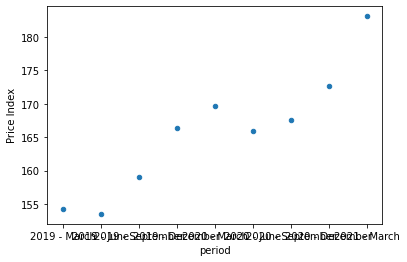

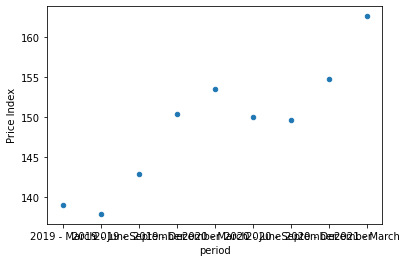

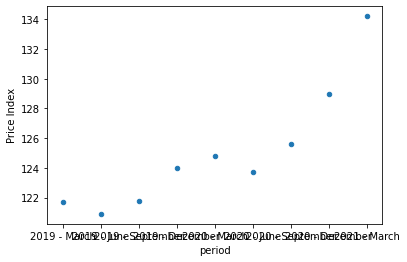

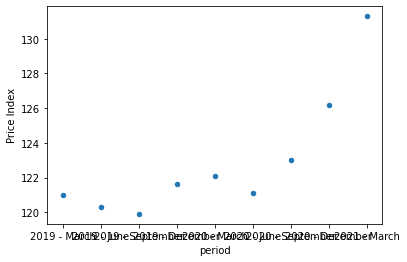

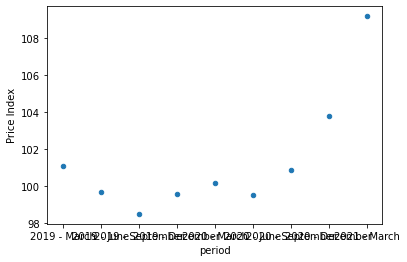

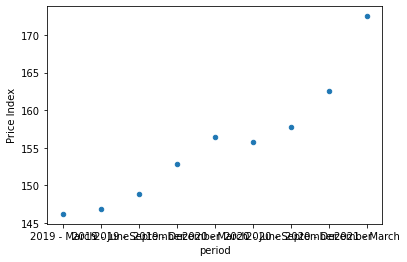

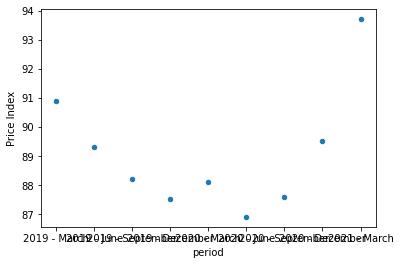

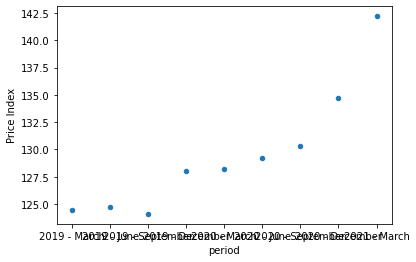

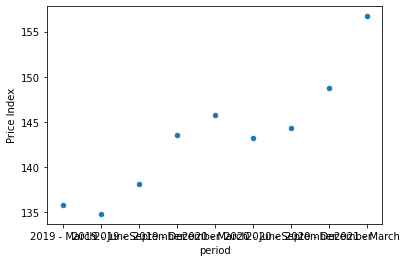

In [12]:
for region in reg:
  new_df = Property_Index.where(Property_Index['Region']==region)
  new_df = new_df.dropna()
  new_df['period'] = new_df.index
  new_df.plot.scatter("period", 'Price Index')

In the above scatter graph, if we all focus then we can see that the price are normally increasing with the passing months but suddenly there is a dip durin dec to may june, which is the peak time when covid spreads in the locality, and once lockdown removed there in increse but the stip is slow



LINE GRAPH

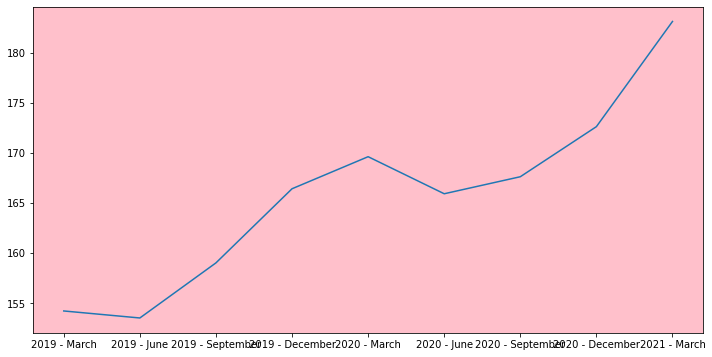

In [13]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
ax = plt.axes()
ax.set_facecolor("pink")
plt.plot(sydney.period, sydney['Price Index'])
plt.show()

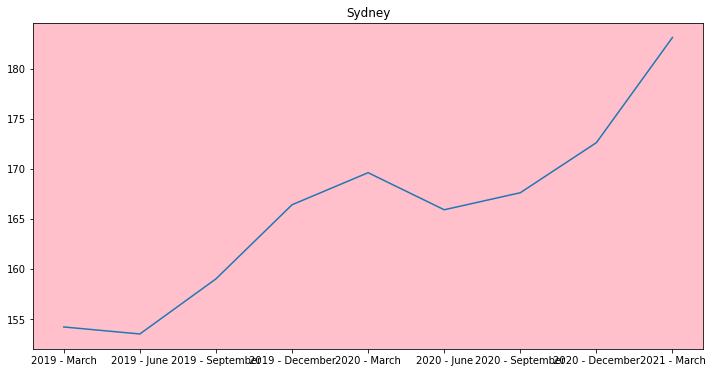

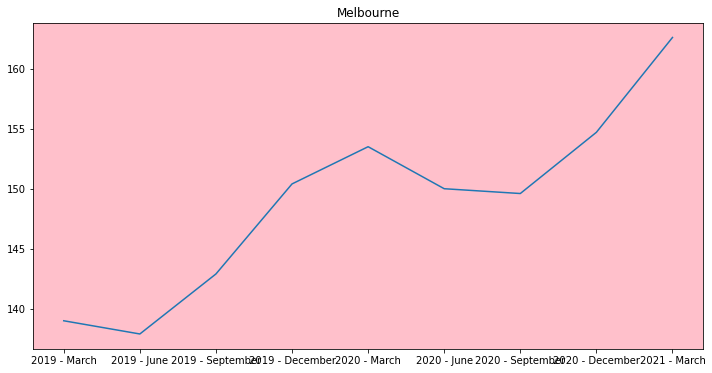

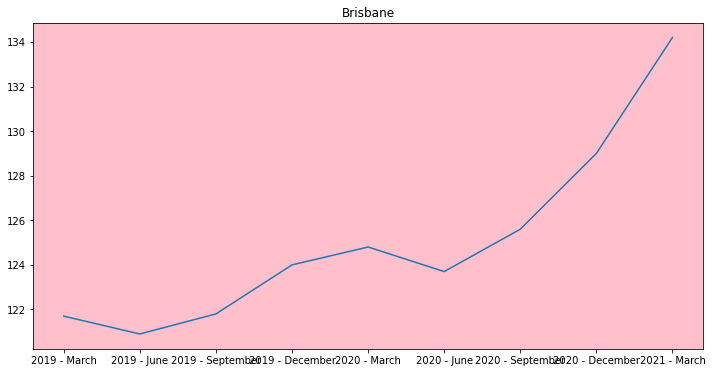

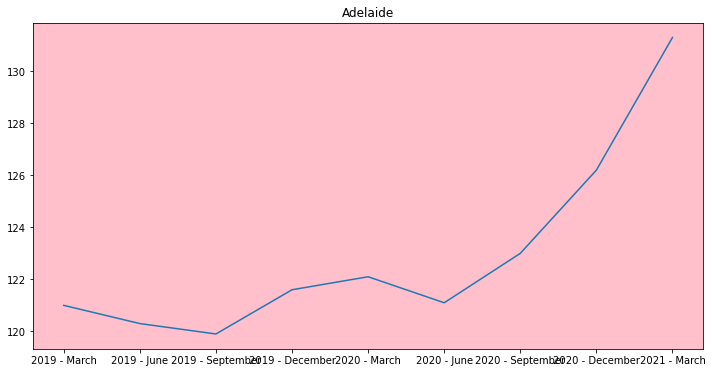

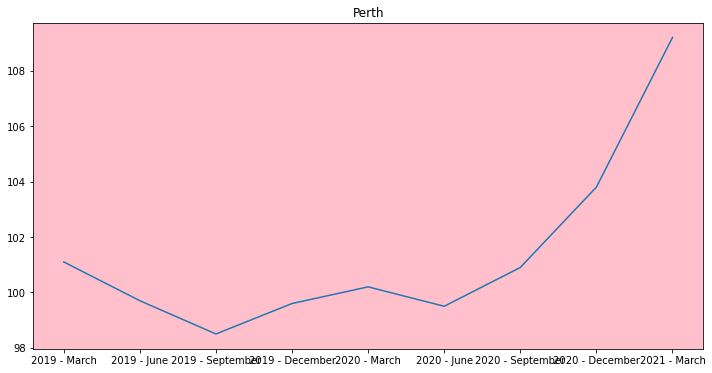

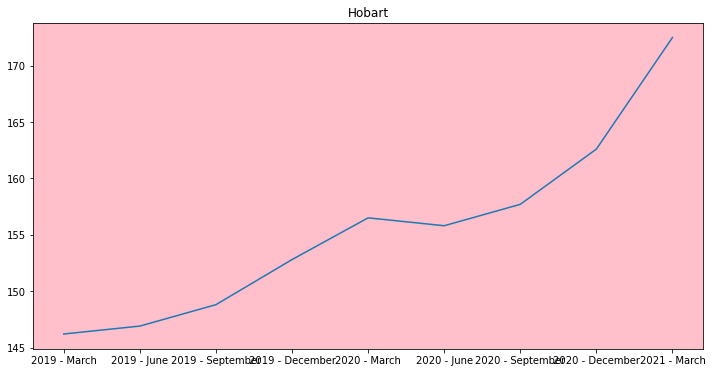

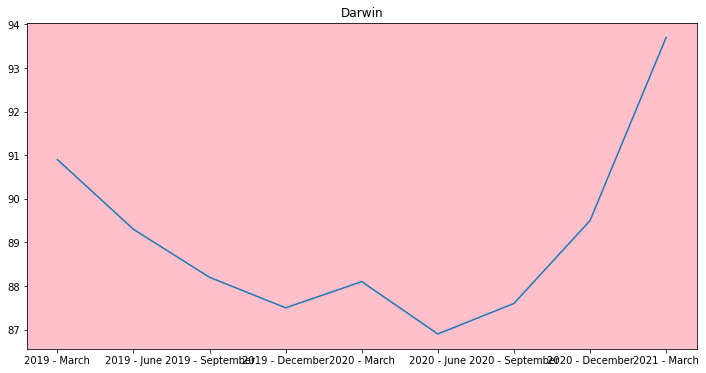

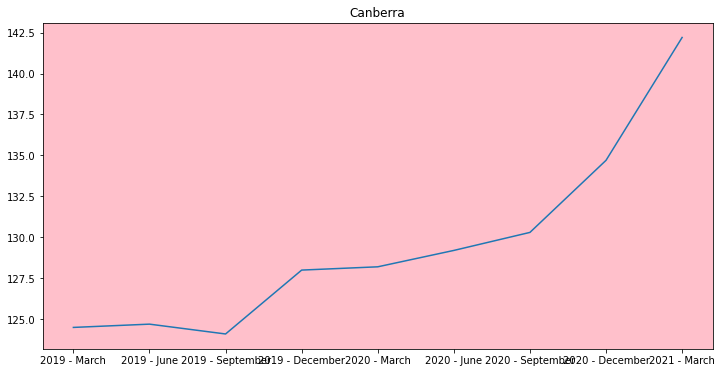

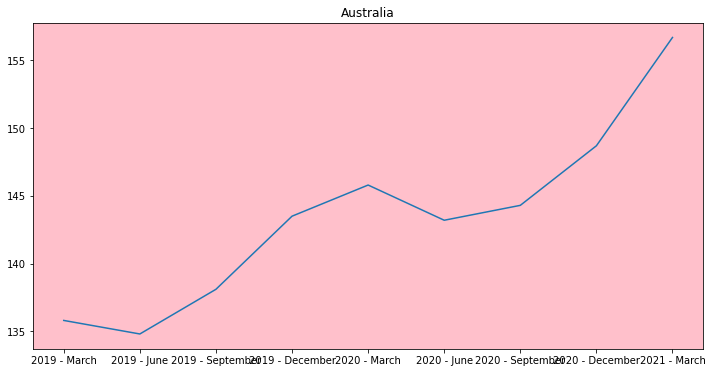

In [14]:
for region in reg:
  new_df = Property_Index.where(Property_Index['Region']==region)
  new_df = new_df.dropna()
  new_df['period'] = new_df.index
  f = plt.figure()
  f.set_figwidth(12)
  f.set_figheight(6)
  ax = plt.axes()
  ax.set_facecolor("pink")
  plt.plot(new_df.period, new_df['Price Index'])
  plt.title(region)
  plt.show()

The above graph represents a similar trend to the others explored previously. Pirce will decrease during the lockdown as less people intend on buying a house, so to attract more buyers, the price of houses will decrease. This is show with the slight declination of the line graph at March.

In [15]:
cities = {}
for region in reg:
  new_df = Property_Index.where(Property_Index['Region']==region)
  new_df = new_df.dropna()
  new_df['period'] = new_df.index
  cities[region] = new_df['Price Index'].tolist()
months = sydney['period'].tolist()
print(cities)
print(months)

{'Sydney': [154.2, 153.5, 159.0, 166.4, 169.6, 165.9, 167.6, 172.6, 183.1], 'Melbourne': [139.0, 137.9, 142.9, 150.4, 153.5, 150.0, 149.6, 154.7, 162.6], 'Brisbane': [121.7, 120.9, 121.8, 124.0, 124.8, 123.7, 125.6, 129.0, 134.2], 'Adelaide': [121.0, 120.3, 119.9, 121.6, 122.1, 121.1, 123.0, 126.2, 131.3], 'Perth': [101.1, 99.7, 98.5, 99.6, 100.2, 99.5, 100.9, 103.8, 109.2], 'Hobart': [146.2, 146.9, 148.8, 152.8, 156.5, 155.8, 157.7, 162.6, 172.5], 'Darwin': [90.9, 89.3, 88.2, 87.5, 88.1, 86.9, 87.6, 89.5, 93.7], 'Canberra': [124.5, 124.7, 124.1, 128.0, 128.2, 129.2, 130.3, 134.7, 142.2], 'Australia': [135.8, 134.8, 138.1, 143.5, 145.8, 143.2, 144.3, 148.7, 156.7]}
['2019 - March', '2019 - June', '2019 - September', '2019 - December', '2020 - March', '2020 - June', '2020 - September', '2020 - December', '2021 - March']


In the above graph we can observe the similiar pattern we can say that this graph is the proof of above graph , price decreases with the lockdown people stop buying in lockdown as we can see the downward trend in price index with the lockdown months

BAR GRAPH FOR EVERY MONTH CITY WISE

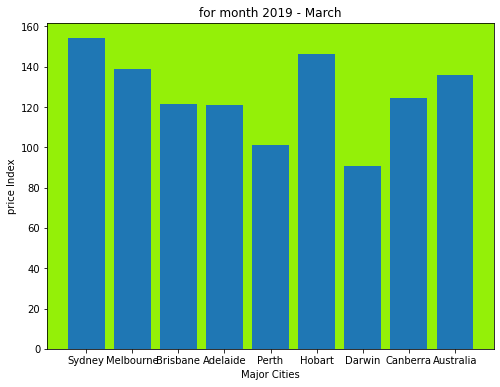

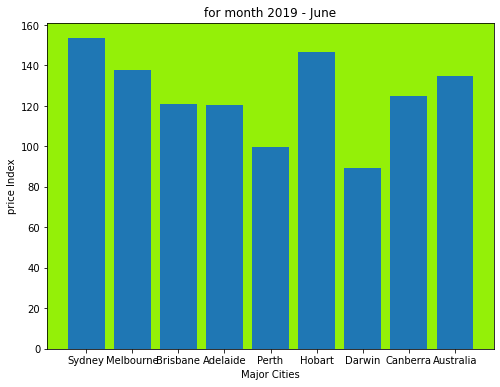

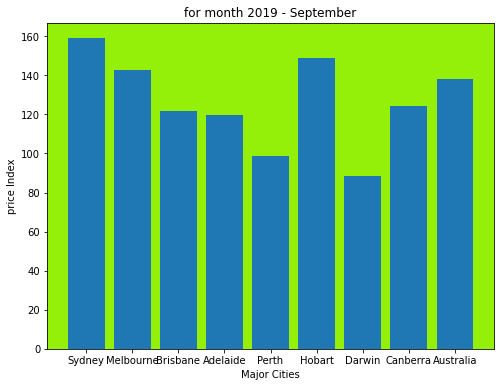

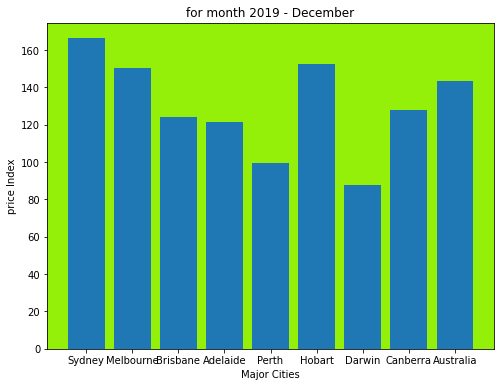

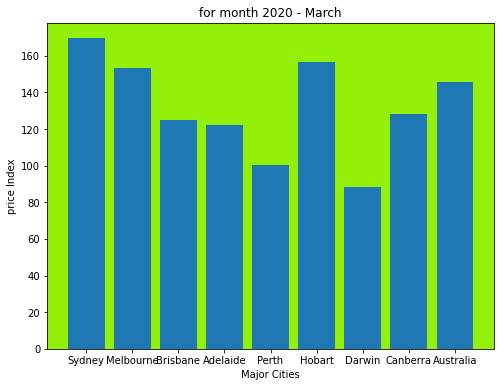

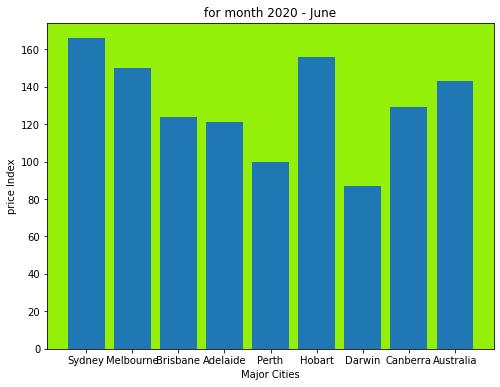

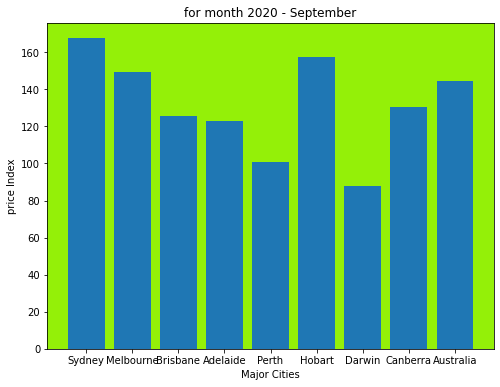

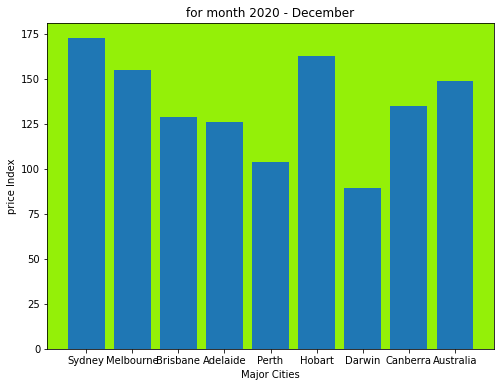

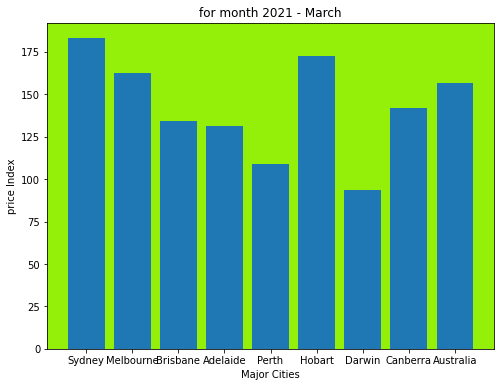

In [16]:
n =0
for m in months:
  
  city = []
  value = []
  
  for i, j in cities.items():
    city.append(i)
    value.append(j[n])
  f = plt.figure()
  f.set_figwidth(8)
  f.set_figheight(6)
  ax = plt.axes()
  ax.set_facecolor("#94F008")
  plt.bar(city, value)
  plt.xlabel("Major Cities")
  plt.ylabel("price Index")
  plt.title(f"for month {m}")
  n = n+1
  plt.show()

In the above analysis we can see that the prices of the some major cities are always higher than the less populated cities

### Question 2 - How many people have purchased houses during the pandemic? What factors may have influenced this?

#### A. Preparing data 

In [17]:
#Fill NaN values with 0
Data = NSW_Change
Data.fillna(0)

,Local Government Area,Natural increase,Net internal migration,Net overseas migration,Area (km^2),Population density 2020 (km^2)
0,Albury (C),201,335,175,305.9,180.0
1,Armidale Regional (A),128,-464,228,7809.4,3.8
2,Ballina (A),-81,554,122,484.9,93.2
3,Balranald (A),10,-46,4,21690.7,0.1
4,Bathurst Regional (A),150,132,102,3817.9,11.5
...,...,...,...,...,...,...
124,Wollondilly (A),431,358,73,2555.4,21.1
125,Wollongong (C),747,-434,1409,684.0,321.3
126,Woollahra (A),257,-639,468,12.3,4840.6
127,Yass Valley (A),67,136,32,3995.3,4.3


#### B. Comparing population between greater suburbs and states

In [18]:
NSW_Change.shape

(129, 6)

In [19]:
NSW_Change.describe()

,Natural increase,Net internal migration,Net overseas migration,Area (km^2),Population density 2020 (km^2)
count,129.000000,129.000000,129.000000,129.000000,129.000000
mean,662.193798,-323.286822,904.279070,11693.079070,790.649612
std,3796.445675,2154.694171,5175.723914,70513.824735,1765.582960
min,-398.000000,-20887.000000,1.000000,5.700000,0.000000
25%,4.000000,-186.000000,11.000000,333.600000,1.600000
50%,40.000000,-44.000000,53.000000,3220.100000,8.200000
75%,385.000000,132.000000,292.000000,7140.900000,321.300000
max,42713.000000,4703.000000,58327.000000,800810.800000,9301.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

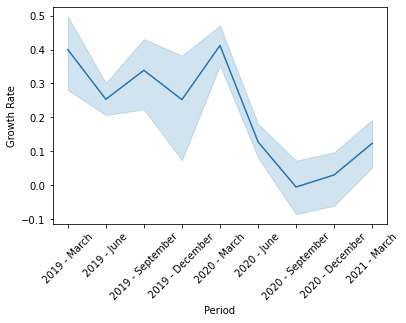

In [20]:
sns.lineplot('Period','Growth Rate',data=Population)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

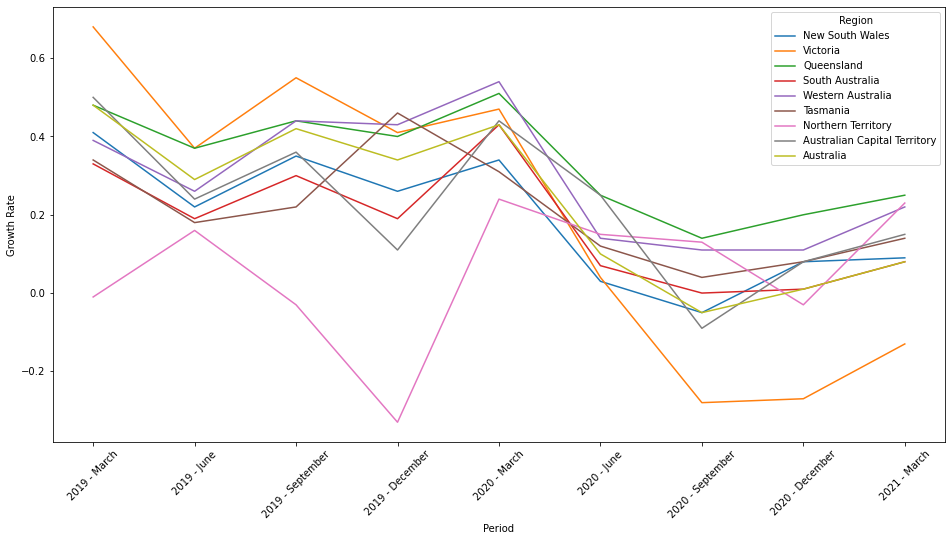

In [21]:
plt.figure(figsize=(16,8))
sns.lineplot('Period','Growth Rate',hue='Region',data=Population)
plt.xticks(rotation=45)

<u>Analysis</u>

As can be seen from the graph above, there was a sharp downward trend from March 2020 when Australia was heavily impacted by COVID-19. All the states except Victoria have generally experienced a similar fall and rise. As Victoria was the most effected state with the highest number of days in lockdown it is expected that their growth rate has been more volatile over the period

In [22]:
NSW_Population.sort_values(by='2019-2020 Population Change').head(5)

,Local Government Area,2019 Population,2020 Population,2019-2020 Population Change,Percentage of Change (%)
40,Fairfield (C),211654,210825,-829,-0.4
16,Broken Hill (C),17477,17269,-208,-1.2
75,Moree Plains (A),13260,13077,-183,-1.4
76,Mosman (A),30960,30785,-175,-0.6
29,Cobar (A),4572,4417,-155,-3.4


In [23]:
#Merging NSW_population and NSW_Change
NSW_Population_Change = pd.merge(NSW_Population,NSW_Change,on='Local Government Area')
NSW_Population_Change

,Local Government Area,2019 Population,2020 Population,2019-2020 Population Change,Percentage of Change (%),Natural increase,Net internal migration,Net overseas migration,Area (km^2),Population density 2020 (km^2)
0,Albury (C),54344,55055,711,1.3,201,335,175,305.9,180.0
1,Armidale Regional (A),29812,29704,-108,-0.4,128,-464,228,7809.4,3.8
2,Ballina (A),44622,45217,595,1.3,-81,554,122,484.9,93.2
3,Balranald (A),2338,2306,-32,-1.4,10,-46,4,21690.7,0.1
4,Bathurst Regional (A),43612,43996,384,0.9,150,132,102,3817.9,11.5
...,...,...,...,...,...,...,...,...,...,...
124,Wollondilly (A),53143,54005,862,1.6,431,358,73,2555.4,21.1
125,Wollongong (C),218076,219798,1722,0.8,747,-434,1409,684.0,321.3
126,Woollahra (A),59345,59431,86,0.1,257,-639,468,12.3,4840.6
127,Yass Valley (A),17086,17321,235,1.4,67,136,32,3995.3,4.3


In [24]:
#Filtering data
Total_filter = NSW_Population_Change['Local Government Area']!='TOTAL NEW SOUTH WALES'
NSW_Population_Change_Filtered = NSW_Population_Change[Total_filter]


Text(0.5, 1.0, 'Relationship between the net overseas migration  and population change')

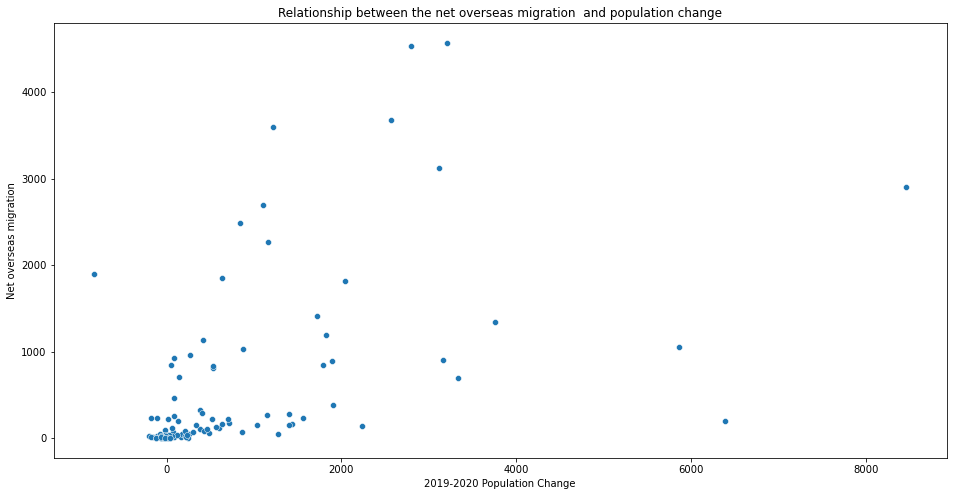

In [25]:
plt.figure(figsize=(16,8))
sns.scatterplot('2019-2020 Population Change','Net overseas migration',data=NSW_Population_Change_Filtered)
plt.title('Relationship between the net overseas migration  and population change')

No relationship between net overseas migration and population can be seen as the Australian borders have been shut since March 2020 which has restricted overseas migration.

Text(0.5, 1.0, 'Relationship between the natural increase  and population change')

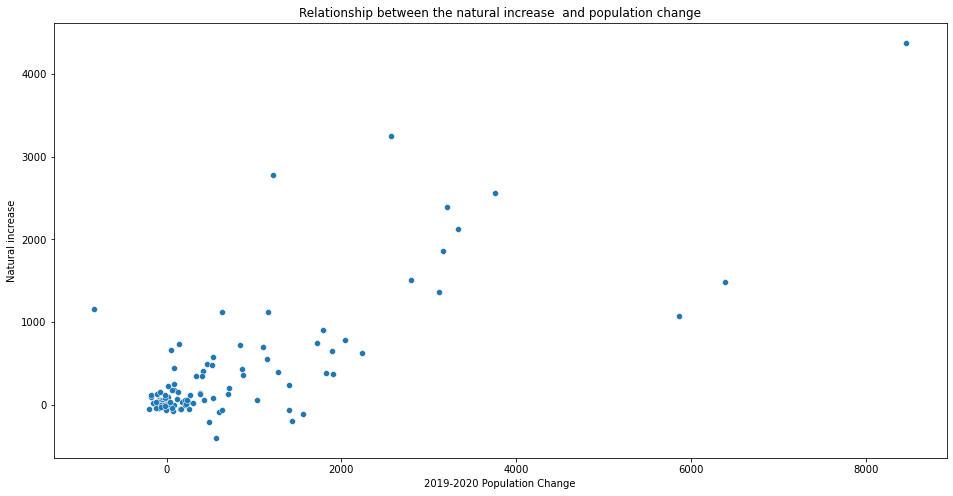

In [26]:
plt.figure(figsize=(16,8))
sns.scatterplot('2019-2020 Population Change','Natural increase',data=NSW_Population_Change_Filtered)
plt.title('Relationship between the natural increase  and population change')

In [27]:
NSW_Population_Change_Filtered[NSW_Population_Change_Filtered['Natural increase'] >4000]

,Local Government Area,2019 Population,2020 Population,2019-2020 Population Change,Percentage of Change (%),Natural increase,Net internal migration,Net overseas migration,Area (km^2),Population density 2020 (km^2)
9,Blacktown (C),374372,382831,8459,2.3,4374,1180,2905,240.0,1594.8


Australia did not see a massive impact on natural increase from COVID-19 as the death rate is relatively low. There is only one outlier which is Blacktown and it can be said that due to the high population they have a higher natural increase.

Text(0.5, 1.0, 'Relationship between the net internal migration  and population change')

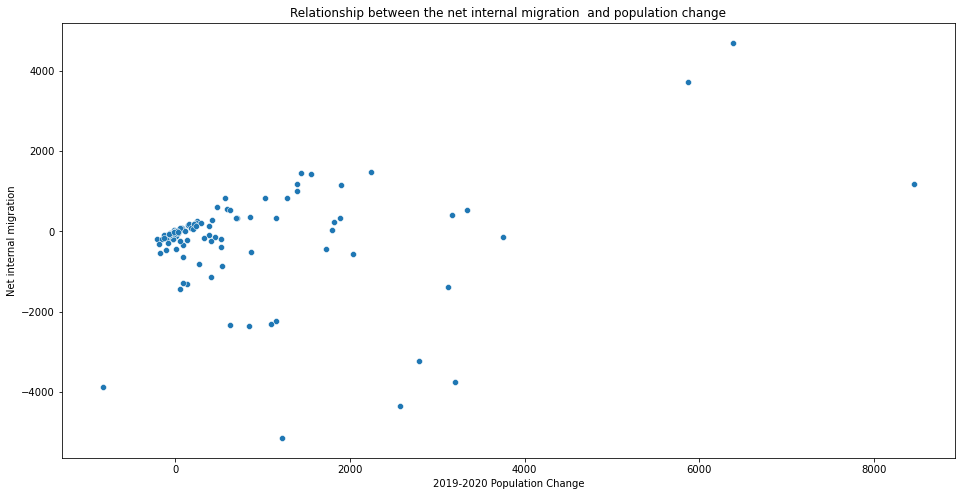

In [28]:
plt.figure(figsize=(16,8))
sns.scatterplot('2019-2020 Population Change','Net internal migration',data=NSW_Population_Change_Filtered)
plt.title('Relationship between the net internal migration  and population change')

In [29]:
NSW_Population_Change_Filtered[NSW_Population_Change_Filtered['Net internal migration'] >2000]

,Local Government Area,2019 Population,2020 Population,2019-2020 Population Change,Percentage of Change (%),Natural increase,Net internal migration,Net overseas migration,Area (km^2),Population density 2020 (km^2)
20,Camden (A),101420,107806,6386,6.3,1480,4703,203,201.0,536.3
109,The Hills Shire (A),177927,183791,5864,3.3,1081,3725,1058,386.2,475.9


From the scatterplot we can see a few outliers and have identified them as The Hills Shire and Camden.Both these local government areas are quite far away from the CBD which illustrates the effet that COVID-19 has had on the population's Living situation. Due to the lockdowns and people being forced to work from home, some have foudn that they very much enjoy it and have chosen to continue to work from home even when lockdown was lifted. This means that they are able to live further away from the CBD as they no longer have to think about their commute. They also are looking in local government areas that are further away so rent is cheaper and they can afford a bigger place while also choosing a "lifestyle" suburb that is close to a beach. Many also wer

### Question 3 - Compare the housing prices to the population in Australia, what is the trend?

#### A. Preparing the data

In [30]:
#Joining both data sets for easier side-by-side comparison and fill any NaN values with 0
Data = pd.concat([Property_Index,Population],axis=1)
Data.fillna(0)

,Region,Price Index,Growth rate,Region,Population,Growth Rate
Period,,,,,,
2019 - March,Sydney,154.2,-10.3,New South Wales,33259,0.41
2019 - June,Sydney,153.5,-9.6,New South Wales,17455,0.22
2019 - September,Sydney,159.0,-4.6,New South Wales,28706,0.35
2019 - December,Sydney,166.4,3.7,New South Wales,21237,0.26
2020 - March,Sydney,169.6,10.0,New South Wales,27317,0.34
...,...,...,...,...,...,...
2020 - March,Australia,145.8,7.4,Australia,110742,0.43
2020 - June,Australia,143.2,6.2,Australia,24686,0.10
2020 - September,Australia,144.3,4.5,Australia,-12397,-0.05


#### B. Comparing Housing Price to Population

In [31]:
Property_Index.shape

(81, 3)

In [32]:
Property_Index.describe()

,Price Index,Growth rate
count,81.000000,81.000000
mean,131.302469,1.604938
std,24.488650,5.107052
min,86.900000,-10.300000
25%,120.900000,-2.500000
50%,130.300000,2.400000
75%,150.000000,5.200000
max,183.100000,10.900000


In [33]:
Population.shape

(81, 3)

In [34]:
Population.describe()

,Population,Growth Rate
count,81.000000,81.000000
mean,13161.086420,0.214691
std,25489.361109,0.202096
min,-18677.000000,-0.330000
25%,598.000000,0.080000
50%,2885.000000,0.220000
75%,18856.000000,0.370000
max,121676.000000,0.680000


In [35]:
State_AVG=Property_Index.groupby('Region').mean()
State_AVG.round(2)

,Price Index,Growth rate
Region,,
Adelaide,122.94,1.72
Australia,143.43,1.47
Brisbane,125.08,1.46
Canberra,129.54,3.09
Darwin,89.08,-1.99
Hobart,155.53,5.39
Melbourne,148.96,1.62
Perth,101.39,0.09
Sydney,165.77,1.60


In [36]:
Population_AVG=Population.groupby('Region').mean()
Population_AVG.round(2)

,Population,Growth Rate
Region,,
Australia,59227.67,0.23
Australian Capital Territory,961.89,0.23
New South Wales,15522.56,0.19
Northern Territory,136.33,0.06
Queensland,17305.44,0.34
South Australia,3123.22,0.18
Tasmania,1132.00,0.21
Victoria,13329.22,0.20
Western Australia,7711.44,0.29


##### B1 - Computing for Population Growth Rate

In [37]:
# Drop unnecessary columns of data
Growth=Population.drop(columns='Population')
Growth

,Region,Growth Rate
Period,,
2019 - March,New South Wales,0.41
2019 - June,New South Wales,0.22
2019 - September,New South Wales,0.35
2019 - December,New South Wales,0.26
2020 - March,New South Wales,0.34
...,...,...
2020 - March,Australia,0.43
2020 - June,Australia,0.10
2020 - September,Australia,-0.05


In [38]:
# Reset the indexing column and apply it as permanent for future data coding
Growth.reset_index(inplace=True)

In [39]:
Growth.groupby(['Region','Period']).sum()

Growth Rate
Region            Period                       
Australia         2019 - December          0.34
                  2019 - June              0.29
                  2019 - March             0.48
                  2019 - September         0.42
                  2020 - December          0.01
...                                         ...
Western Australia 2020 - December          0.11
                  2020 - June              0.14
                  2020 - March             0.54
                  2020 - September         0.11
                  2021 - March             0.22

[81 rows x 1 columns]

In [40]:
#Computing for Population against State growth analysis - values are already normalised and put into a pivot table to get up a heatmap
Analysis=Growth.groupby(['Period','Region'], as_index=False).sum().pivot('Period','Region').fillna(0)
Analysis

Growth Rate                                               \
Region             Australia Australian Capital Territory New South Wales   
Period                                                                      
2019 - December         0.34                         0.11            0.26   
2019 - June             0.29                         0.24            0.22   
2019 - March            0.48                         0.50            0.41   
2019 - September        0.42                         0.36            0.35   
2020 - December         0.01                         0.08            0.08   
2020 - June             0.10                         0.25            0.03   
2020 - March            0.43                         0.44            0.34   
2020 - September       -0.05                        -0.09           -0.05   
2021 - March            0.08                         0.15            0.09   

                                                                         \
Region           Northern Territory Queensland South Australia Tasmania   
Period                                                                    
2019 - December               -0.33       0.40            0.19     0.46   
2019 - June                    0.16       0.37            0.19     0.18   
2019 - March                  -0.01       0.48            0.33     0.34   
2019 - September              -0.03       0.44            0.30     0.22   
2020 - December               -0.03       0.20            0.01     0.08   
2020 - June                    0.15       0.25            0.07     0.12   
2020 - March                   0.24       0.51            0.43     0.31   
2020 - September               0.13       0.14            0.00     0.04   
2021 - March                   0.23       0.25            0.08     0.14   

                                             
Region           Victoria Western Australia  
Period                                       
2019 - December      0.41              0.43  
2019 - June          0.37              0.26  
2019 - March         0.68              0.39  
2019 - September     0.55              0.44  
2020 - December     -0.27              0.11  
2020 - June          0.04              0.14  
2020 - March         0.47              0.54  
2020 - September    -0.28              0.11  
2021 - March        -0.13              0.22

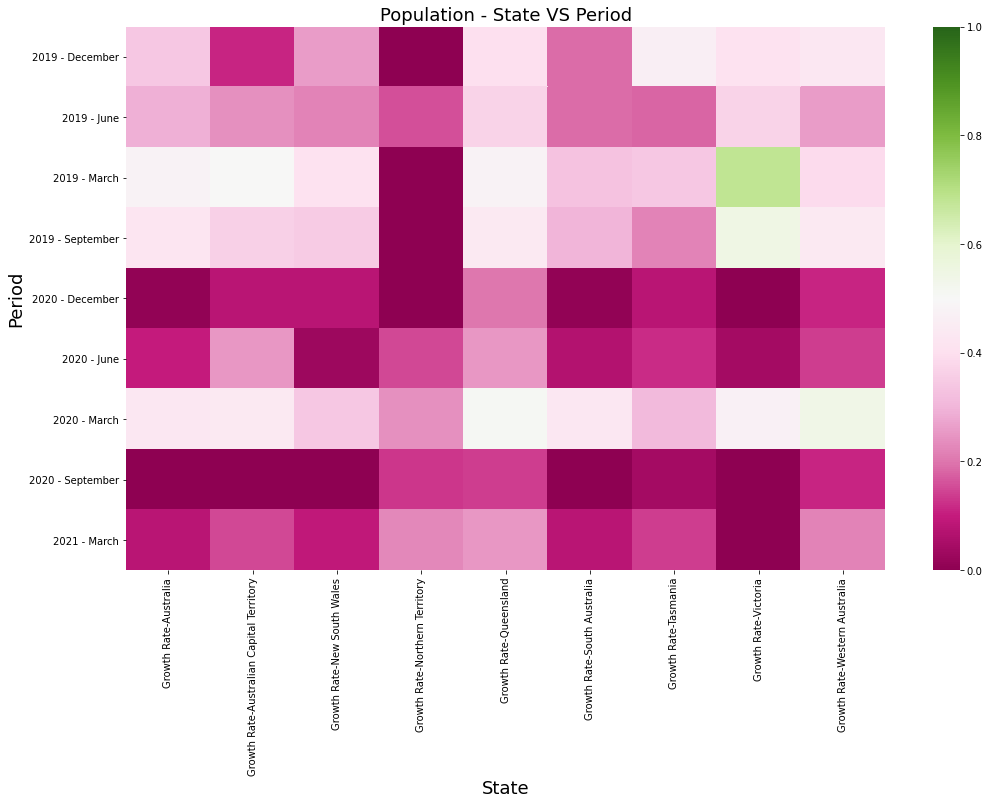

In [41]:
# Compute into a heatmap and analyse the correlation to find the trend against the state and period
plt.figure(figsize=(17,10))
gridnorm=sns.heatmap(Analysis,cmap='PiYG',vmin=0, vmax=1, center=0.5,)
gridnorm.set_title(label='Population - State VS Period', fontsize=18)
gridnorm.set_xlabel('State',fontsize=18)
gridnorm.set_ylabel('Period',fontsize=18)
plt.show()

##### Analysis

From heatmap using already normalised values for the State against Period for the growth rate of population, this depicts the effect of COVID-19 on the population growth from early 2019 - March where there is an average of higher growth rate around 0.5 - 0.7 across all states, decreasing to 0.4-0.5 around 2019 - September to 2019 - June and by the end of 2019 - December the growth rate across all states have decreased to an average of 0.2. The year 2019 is the beginning of COVID-19 and as shown through the data, the correlation from the pandemic to the population has illustrated its effects on travel from domestic and international. This may be a huge factor to the gradual decrease in growth rates across all states.

An outlier depicted from 2019 - March, Victoria shows the only high growth at 0.7 whereas the rest are at the 0 - 0.5 mark. This is prior to COVID restrictions and global pandemic, so a reason for such high rates may be from the holiday travels or any other occasions of tourism.

Over the year of 2020 from March to December it has also shown a fairly similar situation to 2019 but with lower rates. Across most states in early 2020, there is a fairly high avergae around 0.4 - 0.5 with only exception of 2020 - March at Western Australia at 0.6. Gradually, the average rates have decreased close to 0 - 0.2. 

Overall, currently as of 2021 - March there is a low growth rate across all states, we can see a fairly low trend between 0-0.2.

##### B2 - Computing for Price Index Growth Rate

In [42]:
# Drop unnecessary columns of data
Growth2=Property_Index.drop(columns='Price Index')
Growth2

,Region,Growth rate
Period,,
2019 - March,Sydney,-10.3
2019 - June,Sydney,-9.6
2019 - September,Sydney,-4.6
2019 - December,Sydney,3.7
2020 - March,Sydney,10.0
...,...,...
2020 - March,Australia,7.4
2020 - June,Australia,6.2
2020 - September,Australia,4.5


In [43]:
# Reset the indexing column and apply it as permanent for future data coding
Growth2.reset_index(inplace=True)

In [44]:
Growth2.groupby(['Region','Period']).sum()

Growth rate
Region   Period                       
Adelaide 2019 - December           0.3
         2019 - June              -0.1
         2019 - March              0.8
         2019 - September         -1.0
         2020 - December           3.8
...                                ...
Sydney   2020 - December           3.7
         2020 - June               8.1
         2020 - March             10.0
         2020 - September          5.4
         2021 - March              8.0

[81 rows x 1 columns]

In [45]:
#Computing for Price against State growth analysis - values are already normalised and put into a pivot table to get up a heatmap
Analysis2=Growth2.groupby(['Period','Region'], as_index=False).sum().pivot('Period','Region').fillna(0)
Analysis2

Growth rate                                            \
Region              Adelaide Australia Brisbane Canberra Darwin Hobart   
Period                                                                   
2019 - December          0.3       2.5      0.3      1.9   -5.5    4.1   
2019 - June             -0.1      -7.4     -2.7     -0.4   -5.0    2.0   
2019 - March             0.8      -7.4     -1.3      0.0   -4.2    4.6   
2019 - September        -1.0      -3.7     -2.6     -1.4   -5.4    2.1   
2020 - December          3.8       3.6      4.0      5.2    2.3    6.4   
2020 - June              0.7       6.2      2.3      3.6   -2.7    6.1   
2020 - March             0.9       7.4      2.5      3.0   -3.1    7.0   
2020 - September         2.6       4.5      3.1      5.0   -0.7    6.0   
2021 - March             7.5       7.5      7.5     10.9    6.4   10.2   

                                         
Region           Melbourne Perth Sydney  
Period                                   
2019 - December        4.1  -2.5    3.7  
2019 - June           -9.3  -3.9   -9.6  
2019 - March          -9.4  -2.7  -10.3  
2019 - September      -3.5  -4.6   -4.6  
2020 - December        2.9   4.2    3.7  
2020 - June            8.8  -0.2    8.1  
2020 - March          10.4  -0.9   10.0  
2020 - September       4.7   2.4    5.4  
2021 - March           5.9   9.0    8.0

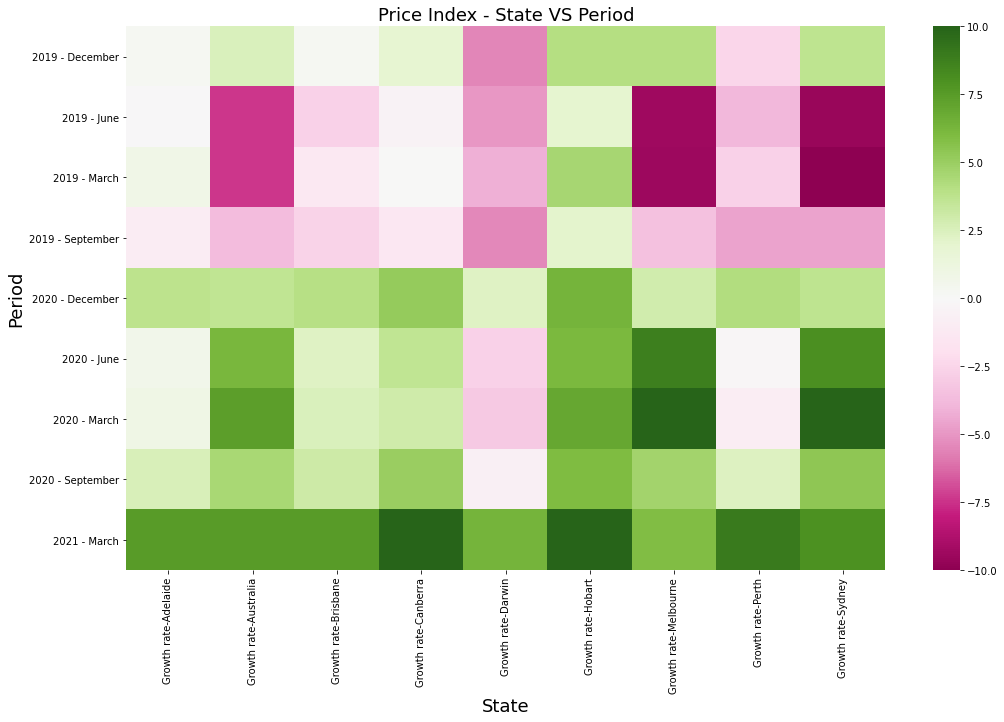

In [46]:
# Plot into heatmap and analyse the trend through the correlations from the population and price index
plt.figure(figsize=(17,10))
gridnorm=sns.heatmap(Analysis2,cmap='PiYG',vmin=-10, vmax=10, center=0)
gridnorm.set_title(label='Price Index - State VS Period', fontsize=18)
gridnorm.set_xlabel('State',fontsize=18)
gridnorm.set_ylabel('Period',fontsize=18)
plt.show()

###### Analysis

There is a high trend of price indexs regardless of population. From comparing against the previous heatmap, although there is a relatively low trend in the population growth, the price indexs are contrastingly high. As shown from this graph, from 2019 - March to 2021 - March the average rates are around 7 - 10 with a few ranging from 0 - -10. Besides outliers in the 2019 - March/June for Melbourne and Sydney which have been negatively impacted from COVID-19 on the population leading to decrease in property index. But gradually throughout the years from 2019 - 2021 currently, we can see a gradual increase from the averages of 0 rates to high rates in the 10 range.

####  C. Visualise the trend of pricing against the population

In [47]:
#Drop unnecessary columns from data
Price_Index = Property_Index.drop(['Growth rate','Region'],axis=1)
Price_Index

,Price Index
Period,
2019 - March,154.2
2019 - June,153.5
2019 - September,159.0
2019 - December,166.4
2020 - March,169.6
...,...
2020 - March,145.8
2020 - June,143.2
2020 - September,144.3


In [48]:
Population_Index = Population.drop(['Population','Region'],axis=1)
Population_Index

,Growth Rate
Period,
2019 - March,0.41
2019 - June,0.22
2019 - September,0.35
2019 - December,0.26
2020 - March,0.34
...,...
2020 - March,0.43
2020 - June,0.10
2020 - September,-0.05


In [49]:
# Join both the Price Index and Growth Rate tables and replace NaN values with 0
Comparison=pd.concat([Price_Index,Population_Index],axis=1)
Comparison.fillna(0)

,Price Index,Growth Rate
Period,,
2019 - March,154.2,0.41
2019 - June,153.5,0.22
2019 - September,159.0,0.35
2019 - December,166.4,0.26
2020 - March,169.6,0.34
...,...,...
2020 - March,145.8,0.43
2020 - June,143.2,0.10
2020 - September,144.3,-0.05


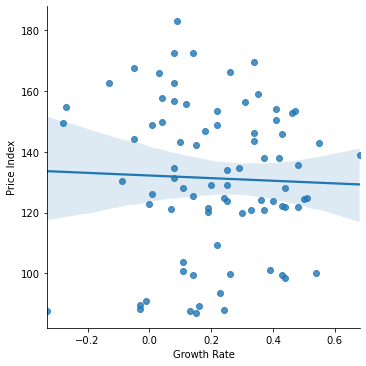

In [50]:
# Visualise into a linear regression model and analyse
sns.lmplot(x="Growth Rate", y="Price Index", data=Comparison)

##### Analysis

From the linear regression model, the Growth Rate against the Price Index illustrates a really scattered relationship no matter of the growth rate. Low growth rates from -0.4 to 0 are highly scattered at the higher Price Index around 140 to 180. Contrastingly, the higher rates from 0.4 to 0.8 are near the midway rates from 100 - 160, with a few outliers near the 100 mark and the rest scattered from 120 - 150. Whereas the middle growth rates from 0 - 0.4 are highly scattered ranging from 0 to 180. 

This relationship doesnt show any specific change in price index depending on the growth rates as the prices range all across the scale.

### Question 4 - Interpret whether the housing prices are over or under fitting.

In [51]:
#reading the data for a better understanding
Property_Index = pd.read_csv("Residental House Prices - 8 Capital Cities.csv",index_col=0)
Property_Index

,Region,Price Index,Growth rate
Period,,,
2019 - March,Sydney,154.2,-10.3
2019 - June,Sydney,153.5,-9.6
2019 - September,Sydney,159.0,-4.6
2019 - December,Sydney,166.4,3.7
2020 - March,Sydney,169.6,10.0
...,...,...,...
2020 - March,Australia,145.8,7.4
2020 - June,Australia,143.2,6.2
2020 - September,Australia,144.3,4.5


In [52]:
#dropping the region, as categorical variables are unnessesary
PIdrop = Property_Index.drop(columns = ['Region'])
PIdrop

,Price Index,Growth rate
Period,,
2019 - March,154.2,-10.3
2019 - June,153.5,-9.6
2019 - September,159.0,-4.6
2019 - December,166.4,3.7
2020 - March,169.6,10.0
...,...,...
2020 - March,145.8,7.4
2020 - June,143.2,6.2
2020 - September,144.3,4.5


In [53]:
#general information about the data
print(Property_Index.describe())

       Price Index  Growth rate
count    81.000000    81.000000
mean    131.302469     1.604938
std      24.488650     5.107052
min      86.900000   -10.300000
25%     120.900000    -2.500000
50%     130.300000     2.400000
75%     150.000000     5.200000
max     183.100000    10.900000


In [54]:
#checking for a correlation 
print(Property_Index.corr())

             Price Index  Growth rate
Price Index     1.000000     0.435671
Growth rate     0.435671     1.000000


<AxesSubplot:xlabel='Price Index', ylabel='Growth rate'>

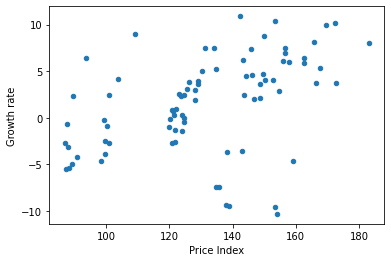

In [55]:
#visualise the data to better understand the distribution
#there is very little correlation from the visualisation, further calulations will be needed
Property_Index.plot.scatter(x = 'Price Index', y = 'Growth rate')

<AxesSubplot:xlabel='Price Index', ylabel='Growth rate'>

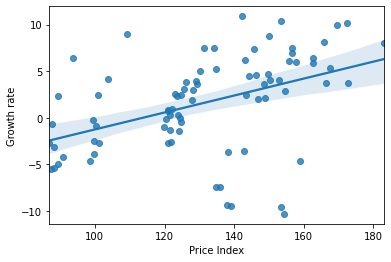

In [56]:
#we can interpret the model by visualising the data with regression to understand the trend of the data
sns.regplot('Price Index', 'Growth rate', data = Property_Index)

In [57]:
# Split data into train and test
train, test = train_test_split(PIdrop, test_size=0.2, random_state=142)

In [58]:
# checking dimensions of the split data
print("train shape: ", train.shape)
print("test shape: ", test.shape)

train shape:  (64, 2)
test shape:  (17, 2)


In [59]:
#creating the test and training data sets
X_train = train.drop(['Growth rate'], axis=1)
y_train = train["Growth rate"]
X_test = test.drop(['Growth rate'], axis=1)
y_test = test["Growth rate"]
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (64, 1)
y_train shape:  (64,)
X_test shape:  (17, 1)
y_test shape:  (17,)


In [60]:
# Building Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [61]:
#checking the coefficients and intercept of the model
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [0.0815941]
Intercept:  -9.130945268508201


In [62]:
#creating a predicted value from the x_test
y_pred = lr.predict(X_test)
y_pred

array([ 3.49166145,  4.5442253 ,  4.44631238,  2.8552275 , -0.89810094,
        4.95219578,  4.70741349,  4.94403637,  0.9948821 ,  0.79089686,
        1.04383856,  3.1081692 ,  3.33663267,  1.94953303,  2.57780757,
        4.40551533,  2.13719945])

In [63]:
#using another regressor to interpret the data
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_test, y_test)

RandomForestRegressor(n_estimators=10)

In [64]:
#a Random Forest Regressor score of 91%
rfr.score(X_test,y_test)

0.9181116664495963

In [65]:
#Linear Regression returns a score of 13%
lr.score(X_train, y_train)

0.13943725937491025

In [66]:
#Linear Regression returns a score of 31%
lr.score(X_test,y_test)

0.3173994816054905

In [67]:
# Evaluation metrics
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("r2-squared: ", r2_score(y_test, y_pred))

MSE:  14.507977246319841
RMSE:  3.808933872663037
MAE:  2.817156662804164
r2-squared:  0.3173994816054905


In [68]:
# Evaluation metrics on train set
y_pred_train = lr.predict(X_train)
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("r2-squared: ", r2_score(y_train, y_pred_train))


MSE:  22.62550546458378
RMSE:  4.75662753057077
MAE:  3.491369841804682
r2-squared:  0.13943725937491025


In [69]:
#resetting the train set for visualisation
train.reset_index(inplace = True)

In [70]:
#selecting the data we need
X_train1 = X_train[['Price Index']]
X_train1

,Price Index
Period,
2020 - March,145.8
2019 - June,120.3
2019 - September,98.5
2019 - March,154.2
2020 - December,129.0
...,...
2021 - March,134.2
2019 - December,150.4
2019 - March,121.0


In [71]:
#selecting the data we need
y_train1 = train.iloc[:,2:]
y_train1

,Growth rate
0,7.4
1,-0.1
2,-4.6
3,-10.3
4,4.0
...,...
59,7.5
60,4.1
61,0.8
62,5.0


In [72]:
#using a KNeighbors Regressor with the new X_train1 and y_train1
knr = KNeighborsRegressor(n_neighbors = 1)

In [73]:
#fitting the model
knr.fit(X_train1, y_train1)

KNeighborsRegressor(n_neighbors=1)

In [74]:
#checking the shape of the data for visualisation
print('X_train1.shape: {}'.format(X_train1.shape))
print('y_train1.shape: {}'.format(y_train1.shape))
#predicting the values for both variables
print('Predicted Price Index: ', knr.predict(X_train1))
print('Predicted Growth Rate: ', knr.predict(y_train1))

X_train1.shape: (64, 1)
y_train1.shape: (64, 1)
Predicted Price Index:  [[  7.4]
 [ -0.1]
 [ -4.6]
 [-10.3]
 [  4. ]
 [  9. ]
 [  2.3]
 [  1.9]
 [  3. ]
 [ -2.5]
 [ 10.9]
 [  6.4]
 [ -5.5]
 [ -9.3]
 [  4.5]
 [  7.5]
 [  2.1]
 [ -7.4]
 [ -3.9]
 [  0.7]
 [ -1. ]
 [ -0.2]
 [  6.4]
 [ -0.9]
 [ -4.2]
 [  4.2]
 [  3.1]
 [ -0.7]
 [  2.6]
 [ 10.4]
 [  4.7]
 [  2.5]
 [  6.4]
 [  8. ]
 [  2.3]
 [ -3.1]
 [ -9.4]
 [ -2.7]
 [ -1.3]
 [ -5.4]
 [ -2.7]
 [  6. ]
 [ -2.6]
 [ -4.6]
 [  5.2]
 [  3.6]
 [  7.5]
 [  0. ]
 [  3.6]
 [ -2.7]
 [  0.9]
 [  6.1]
 [ -5. ]
 [ -3.5]
 [  6.2]
 [  3.8]
 [ 10.4]
 [  7. ]
 [  4.6]
 [  7.5]
 [  4.1]
 [  0.8]
 [  5. ]
 [  0.3]]
Predicted Growth Rate:  [[-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]
 [-2.7]

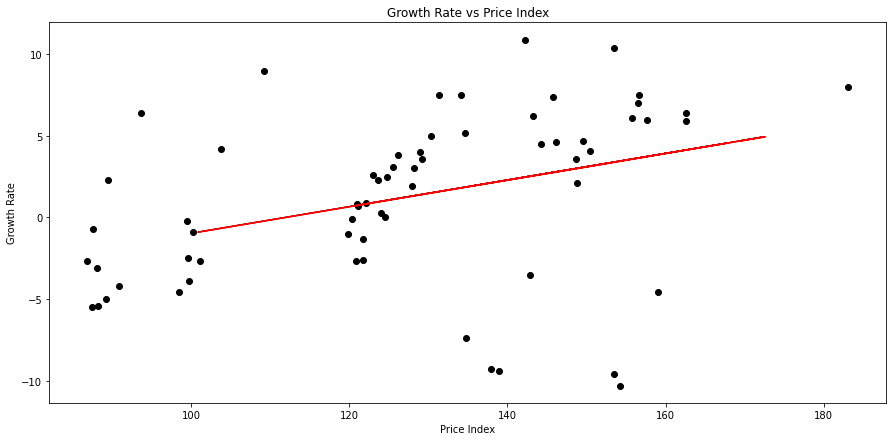

In [75]:
#creating a visualisation of the data
plt.figure(figsize=(15,7))
plt.scatter(X_train1, y_train1, color = 'Black')
y_test = lr.fit(X_train1, y_train1).predict(X_test)
plt.plot(X_test, y_test, color = 'Red')
plt.xlabel('Price Index')
plt.ylabel('Growth Rate')
plt.title('Growth Rate vs Price Index')
plt.show()

##### Analysis
Creating a training and testing model for the data allows for a linear trend to be displayed against the data that we originally obtained. The red line depicts an increase of growth rate which will simultaneously increase the price index of houses, resulting in house prices to rise in the future. Creating a linear regression model has allowed for the data to be analysed and a trend to be predicted from the data obtained. The black points on the scatter plot show no trend, but with the assistance of a linear model (Red Line) we can see that an increase of growth will increase the price.

Taking into consideration the performance of the test data and train data, running simple metrics and complex metrics returns a similar trend. The test data set has returned a better performing result, meaning that the trained model is underfitting. This can ensure that the housing prices are currently underfitting in Australia.